<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Analitika_bol'shih_dannyh/Praktika_PySpark_1/DZ_Kondratev_Spark_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Установка Spark

In [ ]:
!apt-get update

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q https://downloads.apache.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz

In [ ]:
!tar -xvf spark-3.4.2-bin-hadoop3.tgz

In [5]:
!pip install -q findspark

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.2-bin-hadoop3"

In [7]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

### Загрузите данные при помощи spark.read.csv из приложенного файла

In [9]:
df = spark.read.csv('iris.CSV', inferSchema=True, header=True)

In [17]:
df.show(5)

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
+------------+-----------+------------+-----------+-------+-----------+
only showing top 5 rows



### Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка
('sepal_length','sepal_width','petal_length','petal_width')

In [18]:
df_grp = df.groupBy('variety')

In [26]:
df_max = df_grp.max('sepal_length','sepal_width','petal_length','petal_width')
df_max.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [27]:
df_min = df_grp.min('sepal_length','sepal_width','petal_length','petal_width')
df_min.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [28]:
df_avg = df_grp.avg('sepal_length','sepal_width','petal_length','petal_width')
df_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [29]:
import matplotlib.pyplot as plt

TypeError: 'Column' object is not callable

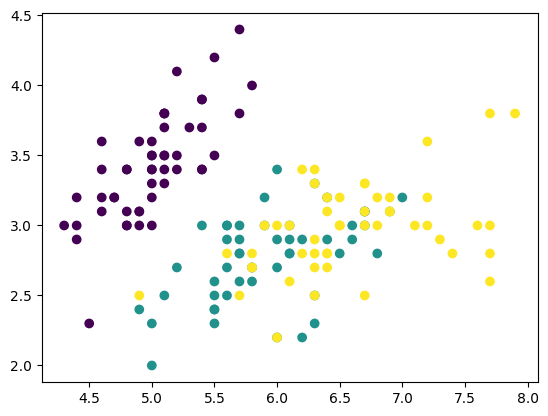

In [34]:
plt.scatter(df[['sepal_length']].collect(), df[['sepal_width']].collect(), c=df[['variety_num']].collect())
plt.legend(df['variety_num'].unique(), loc='upper left')
plt.show()


### Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

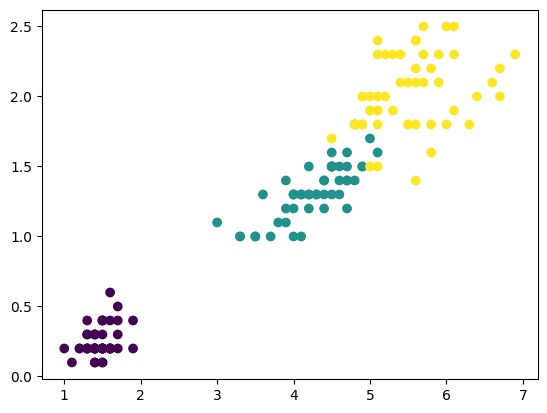

In [32]:
plt.scatter(df[['petal_length']].collect(), df[['petal_width']].collect(), c=df[['variety_num']].collect())
plt.show()